# Data exploration for national Intensive Care Units (ICU) beds

In [1]:
import locale

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.pyplot as plt
import util
from PIL import Image

## Loading data

### Database from http://tabnet.datasus.gov.br/cgi/deftohtm.exe?cnes/cnv/leiutibr.def

In [4]:
def load_tabnet_database(filename):
    df_covid_uti = pd.read_csv(filename, sep=';', skiprows=4, skipfooter=10, engine='python', encoding='ISO-8859-1')
    df_covid_uti = df_covid_uti.replace('-', 0)
    df_covid_uti = df_covid_uti.rename(columns={df_covid_uti.columns[0]: 'municipio'})
    df_covid_uti.iloc[:, 1:] = df_covid_uti.iloc[:, 1:].astype(int)
    df_covid_uti = df_covid_uti[df_covid_uti.columns[1:]].sum().reset_index()
    df_covid_uti.columns = ['date', 'quantity']
    locale.setlocale(locale.LC_TIME, 'pt_PT.utf-8')
    df_covid_uti['date'] = pd.to_datetime(df_covid_uti['date'], format='%Y/%b')
    return df_covid_uti

In [5]:
df_covid_icu_total = load_tabnet_database('data/input/tabnet/uti_adulto_covid.csv')
df_covid_icu_sus = load_tabnet_database('data/input/tabnet/uti_adulto_covid_sus.csv')
df_covid_icu_not_sus = load_tabnet_database('data/input/tabnet/uti_adulto_covid_nao_sus.csv')

## Plotting charts

In [6]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")
colors = util.get_default_colors_categorical_seaborn()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


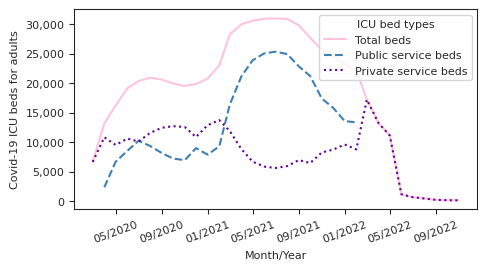

In [8]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(6.6)))

plt.plot(df_covid_icu_total.date, df_covid_icu_total.quantity, color=colors[0], label='Total beds')

plt.plot(df_covid_icu_sus.date, df_covid_icu_sus.quantity, color=colors[1], label='Public service beds', linestyle='--')

plt.plot(df_covid_icu_not_sus.date, df_covid_icu_not_sus.quantity, color=colors[2], label='Private service beds', linestyle=':')

ax.legend(title='ICU bed types')

plt.ylabel('Covid-19 ICU beds for adults')
ax.xaxis.set_major_formatter(myFmt)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.savefig('images/covid_icu_beds.pdf', bbox_inches="tight")
plt.savefig('images/covid_icu_beds.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/covid_icu_beds.tiff")
img.save("images/covid_icu_beds_compressed.tiff", compression="tiff_lzw")
plt.show()